# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# py.init_notebook_mode()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="font-family:cursive;text-align:center">⬇️ Import Data</span>

In [7]:
df = pd.read_csv("data.csv")

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>Use head, tail and sample to see various records in df </b><br>

</div>

In [3]:
df.head(5) #returns the number of rows given as a parameter or by default '5' from the top

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All other   Children or Armed Forces  ...   
2                       Black   All other   Children or Armed Forces  ...   
3   Asian or Pacific Islander   All other   Children or Armed Forces  ...   
4                       White   All other         Not in labor force  ...   

  country_of_birth_mother  migration_code_change_in_msa  \
0                      US                             ?   
1                      US                     unchanged   
2                      US                     unchanged   
3                   India                     unchanged   
4                      US                             ?   

   migration_prev_sunbelt migration_code_move_within_reg  \
0                       ?                              ?   
1                     NaN                      unchanged   
2                     NaN                      unchanged   
3                     NaN                      unchanged   
4                       ?                              ?   

   migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
0                             ?                   NaN               NaN   
1                     unchanged                  Same               NaN   
2                     unchanged                  Same               NaN   
3                     unchanged                  Same               NaN   
4                             ?                   NaN               NaN   

   old_residence_state importance_of_record  income_above_limit  
0                  NaN              1779.74         Below limit  
1                  NaN              2366.75         Below limit  
2                  NaN              1693.42         Below limit  
3                  NaN              1380.27         Below limit  
4                  NaN              1580.79         Below limit  

[5 rows x 43 columns]

In [4]:
df.tail(2) #returns the number of rows given as a parameter or by default '5' from the bottom

ID  age   gender                    education  \
209497  ID_TZ99998   26   Female   Some college but no degree   
209498  ID_TZ99999   19     Male                   11th grade   

                    class education_institute  \
209497            Private                 NaN   
209498   Local government         High school   

                          marital_status    race is_hispanic  \
209497   Married-civilian spouse present   White   All other   
209498                     Never married   Black   All other   

            employment_commitment  ... country_of_birth_mother  \
209497   Children or Armed Forces  ...                      US   
209498   Children or Armed Forces  ...                      US   

        migration_code_change_in_msa  migration_prev_sunbelt  \
209497                     unchanged                     NaN   
209498                    MSA to MSA                    Same   

       migration_code_move_within_reg  migration_code_change_in_reg  \
209497                      unchanged                     unchanged   
209498                    Same county                   Same county   

        residence_1_year_ago old_residence_reg  old_residence_state  \
209497                  Same               NaN                  NaN   
209498                    No             South              Florida   

       importance_of_record  income_above_limit  
209497              3530.26         Below limit  
209498              1987.72         Below limit  

[2 rows x 43 columns]

In [5]:
df.sample(4) # returns random rows on every run

ID  age   gender                                education  \
207082   ID_TZ97802   47     Male                    12th grade no diploma   
47260   ID_TZ141675   32   Female                     High school graduate   
126911    ID_TZ2492   52   Female   Prof school degree (MD DDS DVM LLB JD)   
38646   ID_TZ133914   48     Male               Some college but no degree   

                      class education_institute  \
207082     Local government                 NaN   
47260               Private                 NaN   
126911              Private                 NaN   
38646    Federal government                 NaN   

                          marital_status                        race  \
207082   Married-civilian spouse present                       White   
47260    Married-civilian spouse present   Asian or Pacific Islander   
126911   Married-civilian spouse present                       White   
38646    Married-civilian spouse present                       White   

          is_hispanic      employment_commitment  ... country_of_birth_mother  \
207082   Puerto Rican   Children or Armed Forces  ...             Puerto-Rico   
47260       All other        Full-time schedules  ...                   China   
126911   Puerto Rican   Children or Armed Forces  ...             Puerto-Rico   
38646       All other        Full-time schedules  ...                      US   

        migration_code_change_in_msa  migration_prev_sunbelt  \
207082                     unchanged                     NaN   
47260                              ?                       ?   
126911                     unchanged                     NaN   
38646                              ?                       ?   

       migration_code_move_within_reg  migration_code_change_in_reg  \
207082                      unchanged                     unchanged   
47260                               ?                             ?   
126911                      unchanged                     unchanged   
38646                               ?                             ?   

        residence_1_year_ago old_residence_reg  old_residence_state  \
207082                  Same               NaN                  NaN   
47260                    NaN               NaN                  NaN   
126911                  Same               NaN                  NaN   
38646                    NaN               NaN                  NaN   

       importance_of_record  income_above_limit  
207082               838.23         Below limit  
47260               1435.77         Below limit  
126911              1097.46         Below limit  
38646                492.39         Below limit  

[4 rows x 43 columns]

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>To check shape of the dataframe use .shape() function which return (rows,columns)</b><br>
    📌 &nbsp;<b>To see the name of columns use .columns function which returns name of columns as a list</b><br>
</div>

In [6]:
df.shape

(209499, 43)

In [10]:
df.columns

Index(['id', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [9]:
col_map={
    'ID': 'id',
}
df.rename(columns=col_map, inplace=True)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b> .info() prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.</b><br>
    📌 &nbsp;<b>.describe(): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.</b><br>
</div>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [11]:
df.describe()

age  employment_stat  wage_per_hour  working_week_per_year  \
count  209499.000000    209499.000000  209499.000000          209499.000000   
mean       34.518728         0.176760      55.433487              23.158850   
std        22.306738         0.555562     276.757327              24.397963   
min         0.000000         0.000000       0.000000               0.000000   
25%        15.000000         0.000000       0.000000               0.000000   
50%        33.000000         0.000000       0.000000               8.000000   
75%        50.000000         0.000000       0.000000              52.000000   
max        90.000000         2.000000    9999.000000              52.000000   

       industry_code  occupation_code  total_employed    vet_benefit  \
count  209499.000000    209499.000000   209499.000000  209499.000000   
mean       15.332398        11.321734        1.956067       1.515854   
std        18.049655        14.460839        2.365154       0.850853   
min         0.000000         0.000000        0.000000       0.000000   
25%         0.000000         0.000000        0.000000       2.000000   
50%         0.000000         0.000000        1.000000       2.000000   
75%        33.000000        26.000000        4.000000       2.000000   
max        51.000000        46.000000        6.000000       2.000000   

               gains         losses  stocks_status       mig_year  \
count  209499.000000  209499.000000  209499.000000  209499.000000   
mean      435.926887      36.881737     194.533420      94.499745   
std      4696.359500     270.383302    1956.375501       0.500001   
min         0.000000       0.000000       0.000000      94.000000   
25%         0.000000       0.000000       0.000000      94.000000   
50%         0.000000       0.000000       0.000000      94.000000   
75%         0.000000       0.000000       0.000000      95.000000   
max     99999.000000    4608.000000   99999.000000      95.000000   

       importance_of_record  
count         209499.000000  
mean            1740.888324  
std              995.559557  
min               37.870000  
25%             1061.290000  
50%             1617.040000  
75%             2185.480000  
max            18656.300000

In [12]:
df.describe(include=['O']).T # to include categorical columns

count  unique  \
id                              209499  209499   
gender                          209499       2   
education                       209499      17   
class                           104254       8   
education_institute              13302       2   
marital_status                  209499       7   
race                            209499       5   
is_hispanic                     209499      10   
employment_commitment           209499       8   
unemployment_reason               6520       5   
is_labor_union                   20079       2   
industry_code_main              209499      24   
occupation_code_main            103805      14   
household_stat                  209499      38   
household_summary               209499       8   
under_18_family                  57845       4   
veterans_admin_questionnaire      2084       2   
tax_status                      209499       6   
citizenship                     209499       5   
country_of_birth_own            209499      43   
country_of_birth_father         209499      43   
country_of_birth_mother         209499      43   
migration_code_change_in_msa    207911       9   
migration_prev_sunbelt          121047       3   
migration_code_move_within_reg  207911       9   
migration_code_change_in_reg    207911       8   
residence_1_year_ago            103215       2   
old_residence_reg                16351       5   
old_residence_state              16351      50   
income_above_limit              209499       2   

                                                            top    freq  
id                                                    ID_TZ0000       1  
gender                                                   Female  108784  
education                                  High school graduate   50627  
class                                                   Private   75617  
education_institute                                 High school    7247  
marital_status                                    Never married   90723  
race                                                      White  175709  
is_hispanic                                           All other  180404  
employment_commitment                  Children or Armed Forces  129789  
unemployment_reason                             Other job loser    2242  
is_labor_union                                               No   16968  
industry_code_main                  Not in universe or children  105694  
occupation_code_main             Adm support including clerical   15351  
household_stat                                      Householder   56195  
household_summary                                   Householder   79470  
under_18_family                            Both parents present   40875  
veterans_admin_questionnaire                                 No    1684  
tax_status                                             Nonfiler   78671  
citizenship                                              Native  185669  
country_of_birth_own                                         US  185666  
country_of_birth_father                                      US  166968  
country_of_birth_mother                                      US  168233  
migration_code_change_in_msa                                  ?  104696  
migration_prev_sunbelt                                        ?  104696  
migration_code_move_within_reg                                ?  104696  
migration_code_change_in_reg                                  ?  104696  
residence_1_year_ago                                       Same   86864  
old_residence_reg                                         South    5056  
old_residence_state                                  California    1849  
income_above_limit                                  Below limit  196501

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.isna(): Detect missing values.</b><br>
</div>

In [13]:
df.isna().sum() # add .sum() to get total count of missing values in column

id                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.duplicated(): Detect duplicate values.</b><br>
</div>

In [14]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b>.unique(): returns unique values.</b><br>
    📌 &nbsp;<b>.nunique(): returns the count of unique values.</b><br>
</div>

In [15]:
print("Unique values per column:")
df.nunique()

Unique values per column:


id                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

In [16]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in id:
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999'] 

Unique value in age:
[79 65 21  2 70 45 53 22 73 30  4 16 43 36  5 88 40 47 59 69 50 27 39 85
 29 41 14 33 67 52 11  9 13 19 26 23 37 58 63 46 62 28 31  3 18 78 15 38
  7 35  1 20  0 48 24 56 25  8 66 71 32 75 51 10 44 42 55 74 77 34 80 17
 83 86 12 68 60 57 64 72 90 61 82  6 84 49 76 54 89 81 87] 

Unique value in gender:
[' Female' ' Male'] 

Unique value in education:
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

Unique value in class:
[nan ' Federal government' ' Private' ' Loca

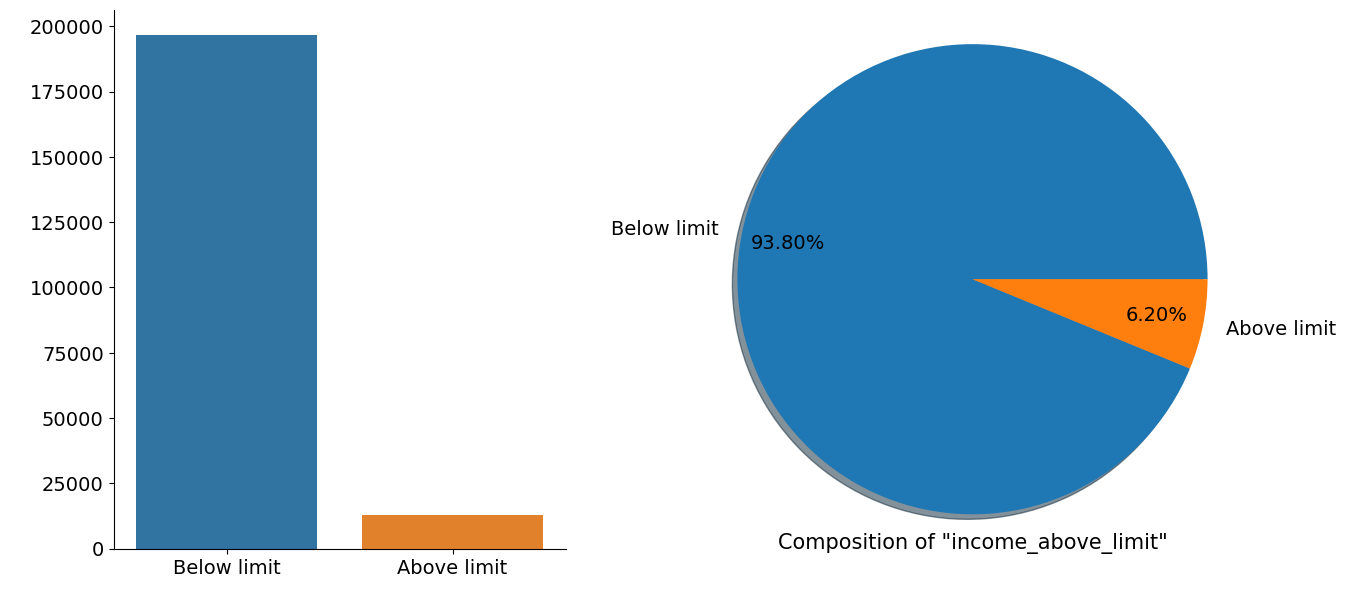

In [17]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["income_above_limit"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["income_above_limit"].value_counts(),
        labels=list(df["income_above_limit"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "income_above_limit"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [19]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'


C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [20]:
fig = px.treemap(df, path=['income_above_limit'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

py.init_notebook_mode(connected=True)
py.iplot(fig,filename= "treemap")

In [18]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# date (day-month-year) time
df["time"].dt.hour

# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

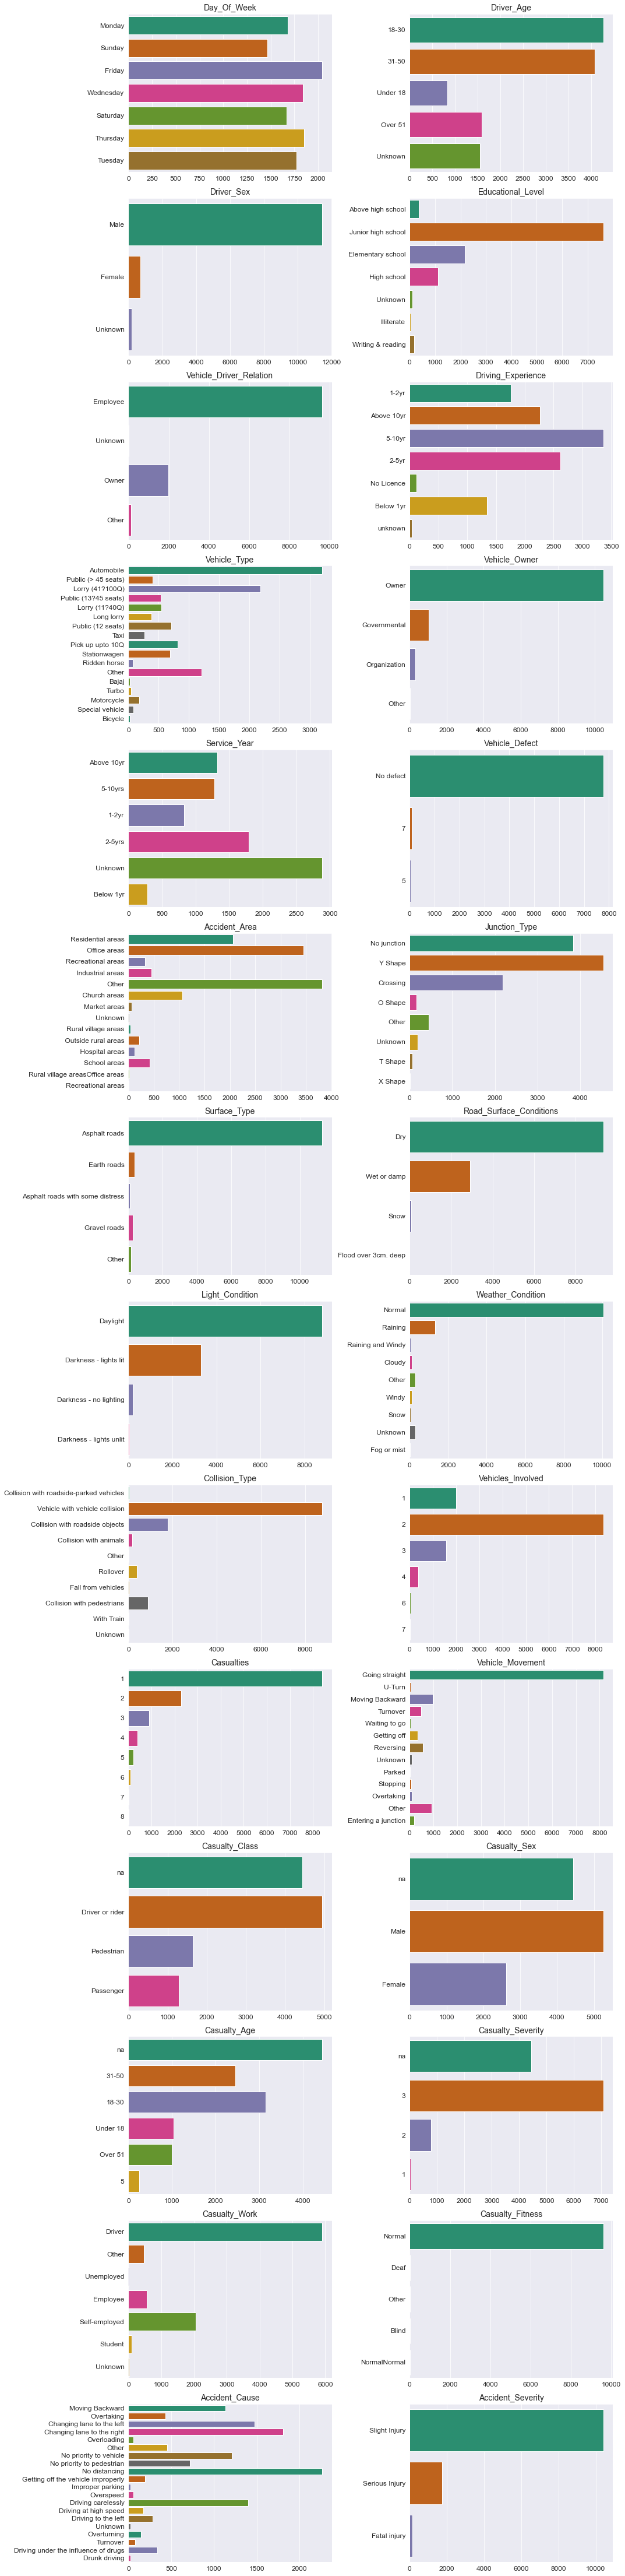

In [19]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

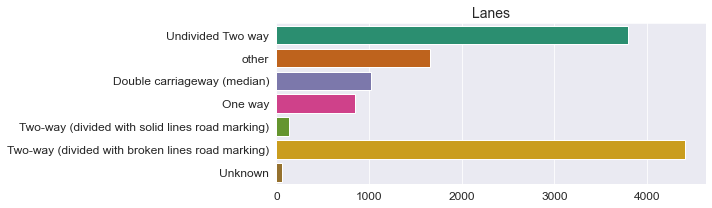

In [20]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

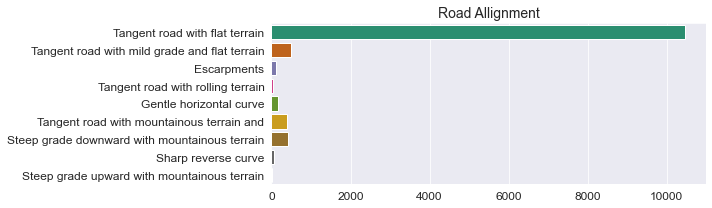

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

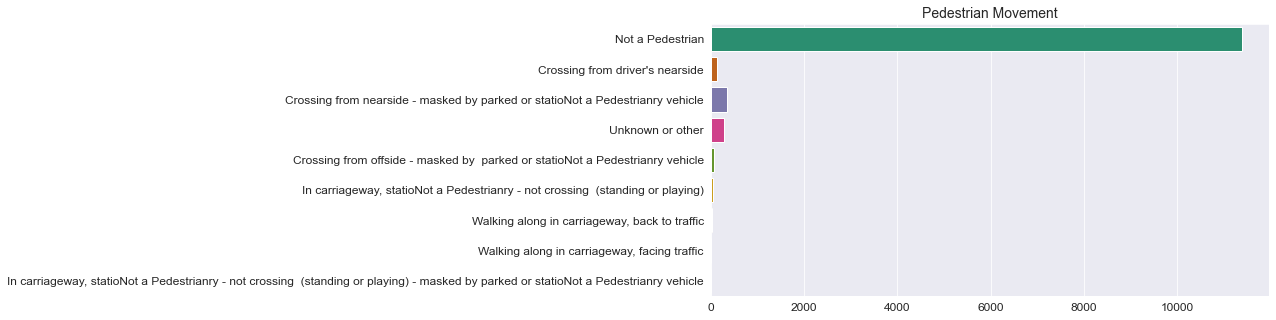

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

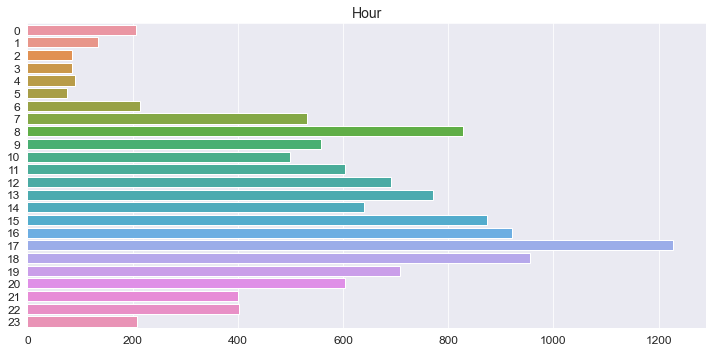

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

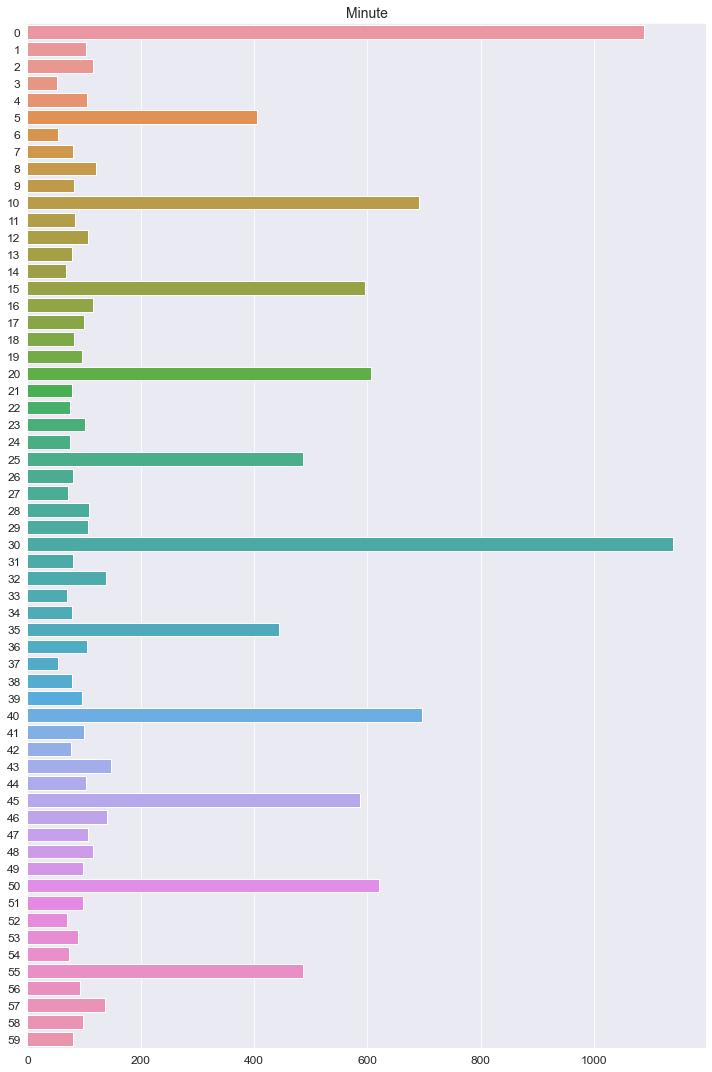

In [24]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.
    
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [25]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

In [26]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

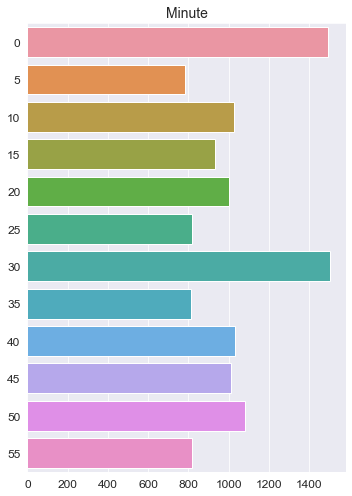

In [27]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

In [ ]:
# //////////////////////////////////////////////////////

In [21]:
hypothesis_df = df.copy(deep=True)

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 1: Which of both genders is actually dangerous in Driving?</font></h2>
    
<font color='#0080FF'><b>Calculating the Conditional Probability; Probability of an Accident Happen When the Driver is a Female and Repeating the Calculations when it's Male.<br>
P(Gender = Male | Severity = 2) P(Gender = Female | Severity = 2)</b></font>

In [82]:
((hypothesis_df.groupby(['driver_sex']).size() / hypothesis_df["driver_sex"].count()) * 100).add_prefix('Accidents(in %) Caused by ')

driver_sex
Accidents(in %) Caused by Female      5.691783
Accidents(in %) Caused by Male       92.862943
Accidents(in %) Caused by Unknown     1.445274
dtype: float64

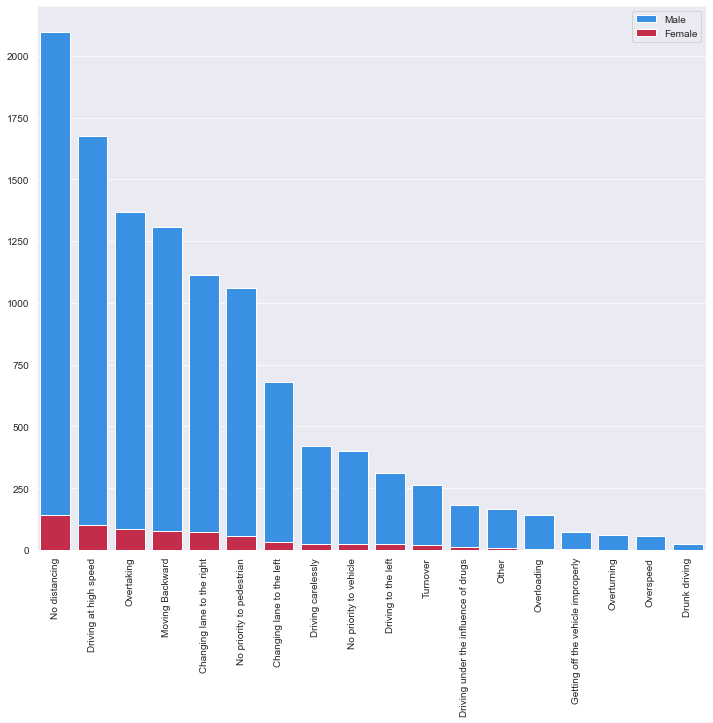

In [85]:
plt.figure(figsize=(12,10))
male_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Male']
female_df = hypothesis_df.loc[hypothesis_df.driver_sex == 'Female']
sns.barplot(data=male_df,x = male_df.accident_cause.unique(),y = male_df.accident_cause.value_counts().values,color='dodgerblue', label="Male")
sns.barplot(data=female_df,x = female_df.accident_cause.unique(),y = female_df.accident_cause.value_counts().values,color='crimson', label="Female")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [86]:
ff = pd.crosstab(index=hypothesis_df['driver_sex'].loc[hypothesis_df['driver_sex'] !="Unknown"], columns=df['accident_severity']
                 , margins=True)
ff

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
driver_sex                                                           
Female                        5             104            592    701
Male                        152            1621           9664  11437
All                         157            1725          10256  12138

In [87]:
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Although, the percentage of Accidents done in this sample by males is over 92% but, it doesn't actually indicate that males are more dangerous
If we calculated the probability for each gender we can deduce that both are quite the same.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 2: Is Speeding is the main Cause for Car Crashes?</font></h2><br>

In [88]:
ff = pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['accident_cause'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity                     Fatal injury  Serious Injury  \
accident_cause                                                       
Changing lane to the left                       16             206   
Changing lane to the right                      23             260   
Driving at high speed                            2              31   
Driving carelessly                              22             209   
Driving to the left                              4              53   
Driving under the influence of drugs             5              46   
Drunk driving                                    0               3   
Getting off the vehicle improperly               3              29   
Improper parking                                 1               2   
Moving Backward                                 26             162   
No distancing                                   20             303   
No priority to pedestrian                        5              95   
No priority to vehicle                          13             149   
Other                                            7              64   
Overloading                                      2              10   
Overspeed                                        1              15   
Overtaking                                       4              75   
Overturning                                      2              23   
Turnover                                         2               6   
Unknown                                          0               2   
All                                            158            1743   

accident_severity                     Slight Injury    All  
accident_cause                                              
Changing lane to the left                      1251   1473  
Changing lane to the right                     1525   1808  
Driving at high speed                           141    174  
Driving carelessly                             1171   1402  
Driving to the left                             227    284  
Driving under the influence of drugs            289    340  
Drunk driving                                    24     27  
Getting off the vehicle improperly              165    197  
Improper parking                                 22     25  
Moving Backward                                 949   1137  
No distancing                                  1940   2263  
No priority to pedestrian                       621    721  
No priority to vehicle                         1045   1207  
Other                                           385    456  
Overloading                                      47     59  
Overspeed                                        45     61  
Overtaking                                      351    430  
Overturning                                     124    149  
Turnover                                         70     78  
Unknown                                          23     25  
All                                           10415  12316

In [89]:
print(f'Injuries(all types due to speeding): {ff.iloc[2,2]}/{ff.iloc[3,3]}')
print(f'In percentage: {(ff.iloc[2,2]/ff.iloc[3,3])*100} %')

Injuries(all types due to speeding): 141/1402
In percentage: 10.057061340941512 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Despite the fact that speeding causes accidents. After analysis it’s found that speeding is not one of the main factors.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 3: Do weekends account for more accidents?</font></h2><br>

In [90]:
ff = pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['day_of_week'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity  Fatal injury  Serious Injury  Slight Injury    All
day_of_week                                                          
Friday                       16             313           1712   2041
Monday                       12             204           1465   1681
Saturday                     37             245           1384   1666
Sunday                       35             190           1242   1467
Thursday                     22             272           1557   1851
Tuesday                      17             257           1496   1770
Wednesday                    19             262           1559   1840
All                         158            1743          10415  12316

In [91]:
print('Accident percentage on weekdays:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in ['Saturday','Sunday']])/ff.iloc[7,3],2))
print('Accident percentage on weekends:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in ['Saturday','Sunday']])/ff.iloc[7,3],2))

Accident percentage on weekdays: 0.75
Accident percentage on weekends: 0.25


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Its quite clear that there is no indication of more accidents happening on weekends

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 4: Are there more dangerous injuries at night than in day? </font></h2><br>
<font color='#0080FF'>We would consider both fatal and serious to be dangerous injuries</font>

In [92]:
ff = pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['light_condition'], columns=hypothesis_df['accident_severity'], margins=True)
ff

accident_severity        Fatal injury  Serious Injury  Slight Injury    All
light_condition                                                            
Darkness - lights lit              66             465           2755   3286
Darkness - lights unlit             0               7             33     40
Darkness - no lighting              5              49            138    192
Daylight                           87            1222           7489   8798
All                               158            1743          10415  12316

In [93]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += ff.iloc[j,i]

r = sol/(sum(ff.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')
r = sum(ff.iloc[i,2] for i in [0,1,2])/sum(ff.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.17 %
Slight injuries at night: 0.83 %


In [94]:
r = sum(ff.iloc[3,i] for i in [0,1])/ff.iloc[3,3]
print('Dangerous injuries at day:',round(r,2),'%')
r = ff.iloc[3,2]/ff.iloc[3,3]
print('Slight injuries at day:',round(r,2),'%')

Dangerous injuries at day: 0.15 %
Slight injuries at day: 0.85 %


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Although it does that in daylight there are more number of accidents but the dangerous injuries percentage are almost same either be it day or night.

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<h2 align="left"><font color='#0080FF'>Hypothesis 5: More accidents under some specific non-normal weather? </font></h2><br>
<font color='#0080FF'>We would not consider normal weather</font>

In [95]:
ff = pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
pd.crosstab(index=hypothesis_df['weather_condition'], columns=hypothesis_df['accident_severity'], margins=True)
ff.drop(['Normal','All'],axis=0)

accident_severity  Fatal injury  Serious Injury  Slight Injury   All
weather_condition                                                   
Cloudy                        0               8            117   125
Fog or mist                   0               1              9    10
Other                         0              28            268   296
Raining                      23             158           1150  1331
Raining and Windy             0               2             38    40
Snow                          0               5             56    61
Unknown                       0              51            241   292
Windy                         0              16             82    98

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Without any analysis we can clearly see that rainy weather causes more accident and also all the fatal injuries have occured under non-normal conditions are there in rainy weather

In [ ]:
# ///////////////////////////

# <span style="font-family:cursive;text-align:center">⚙️ Preprocessing</span>

In [ ]:
# / RTA DATASET


# null values (imputation, missing values)
# high variability (encoding)
# imbalance (sampling)



In [21]:
df.isna().sum()

id                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
# > 80% you can drop (the column should also be insignificant)
# < 80% 
#    - replacing (mean, median, mode)
#    - forward, backward 
#    - imputers (predict numm values) (knn imputer, simple imputer)



# "na" "unknown" NaN

# MAR, MNAR, MCAR

# Missing not at random  -  have not been found (cannot be replaced by any value) (extra category)



In [11]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['education_institute', 'unemployment_reason', 'is_labor_union', 'under_18_family', 'veterans_admin_questionnaire', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state'], inplace=True)

In [12]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [13]:
df.isna().sum() 

id                                0
age                               0
gender                            0
education                         0
class                             0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
occupation_code_main              0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father     

### <span style="font-family:cursive;text-align:center"> Encoding</span>

In [ ]:
# label encoding: ordinal (order) ranks (V)
# one-hot encoding (binary) nominal data 0,1 (X)

# target encoding (look into it in the second)

In [ ]:
# If you are using a pre-built function => split data before encoding
# if you are using own function => you can do either

#  ideally split the data

In [14]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoder(df, df.drop(['income_above_limit'], axis=1).columns)
df.shape

(209499, 35)

In [63]:
df.head()

id  age  gender  education  class  marital_status  race  is_hispanic  \
0   0   79       0         12      3               6     4            0   
1   1   65       0         12      3               6     4            0   
2   2   21       1          2      0               4     2            0   
3   3    2       0         10      3               4     1            0   
4   4   70       1         12      3               2     4            0   

   employment_commitment  employment_stat  wage_per_hour  \
0                      2                0              0   
1                      0                0              0   
2                      0                0            102   
3                      0                0              0   
4                      2                0              0   

   working_week_per_year  industry_code  industry_code_main  occupation_code  \
0                     52              0                  14                0   
1                      0              0                  14                0   
2                     15             41                   9               26   
3                      0              0                  14                0   
4                      0              0                  14                0   

   occupation_code_main  total_employed  household_stat  household_summary  \
0                     0               2              20                  4   
1                     0               0              22                  4   
2                     0               4               2                  0   
3                     0               0               8                  2   
4                     0               0              37                  7   

   vet_benefit  tax_status  gains  losses  stocks_status  citizenship  \
0            2           0      0       0            273            4   
1            2           5      0       0              0            4   
2            2           5      0       0              0            4   
3            0           4      0       0              0            4   
4            2           1      0       0              0            4   

   mig_year  country_of_birth_own  country_of_birth_father  \
0         1                    42                       42   
1         0                    42                       42   
2         0                    42                       42   
3         0                    42                       19   
4         1                    42                       42   

   country_of_birth_mother  migration_code_change_in_msa  \
0                       42                             0   
1                       42                             8   
2                       42                             8   
3                       19                             8   
4                       42                             0   

   migration_prev_sunbelt  migration_code_move_within_reg  \
0                       0                               0   
1                       0                               8   
2                       0                               8   
3                       0                               8   
4                       0                               0   

   migration_code_change_in_reg  importance_of_record income_above_limit  
0                             0                 55690        Below limit  
1                             7                 76194        Below limit  
2                             7                 51881        Below limit  
3                             7                 39247        Below limit  
4                             0                 47108        Below limit

In [64]:
df.to_csv('selected_features.csv', index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15248\1887886506.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

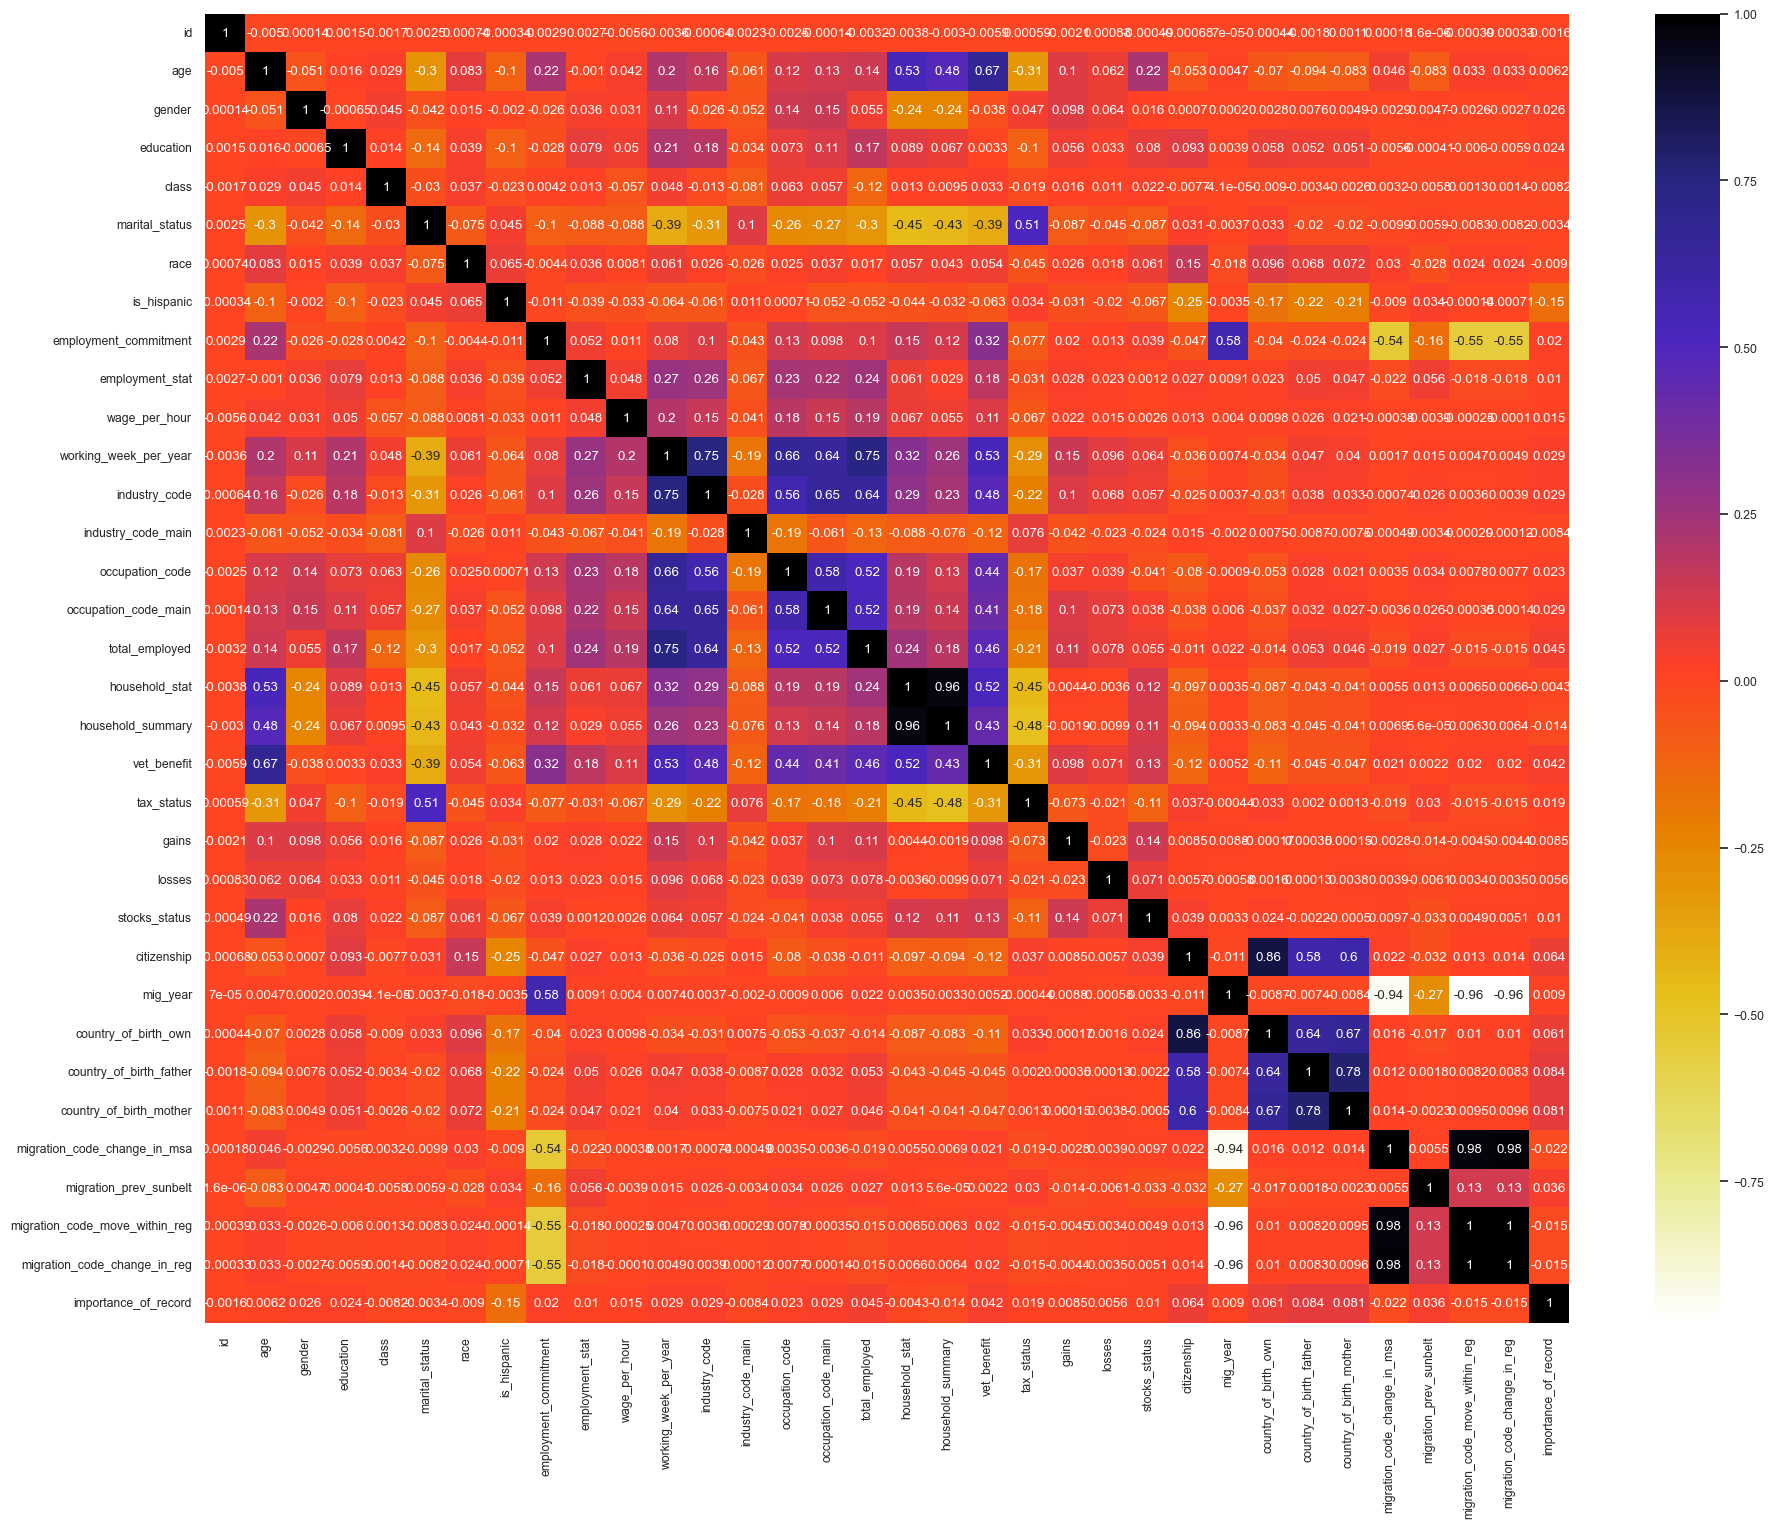

In [28]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [15]:
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)




import warnings
warnings.filterwarnings('ignore')

### <span style="font-family:cursive;text-align:center"> Upsampling</span>

In [16]:
X = df.drop('income_above_limit', axis=1)
y = df['income_above_limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(146649, 34) (62850, 34) (146649,) (62850,)


In [39]:
pip install scikit-learn==1.2.2


     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.3 MB 1.9 MB/s eta 0:00:05
     - -------------------------------------- 0.2/8.3 MB 2.7 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/8.3 MB 3.8 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/8.3 MB 3.8 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.3 MB 4.0 MB/s eta 0:00:02
     ----- ---------------------------------- 1.1/8.3 MB 4.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/8.3 MB 4.1 MB/s eta 0:00:02
     ------- -------------------------------- 1.6/8.3 MB 4.3 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/8.3 MB 4.4 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/8.3 MB 4.5 MB/s eta 0:00:02
     ----------- ---------------------------- 2.3/8.3 MB 4.6 MB/s eta 0:00:02
     ------------ --------------------------- 2.6/8.3 MB 4.6 MB/s eta 

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Below limit, n=137567 (93.81%)
Class= Above limit, n=9082 (6.19%)
Class= Below limit, n=137567 (50.00%)
Class= Above limit, n=137567 (50.00%)
Upsampled data shape:  (275134, 34) (275134,)


In [19]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['income_above_limit']), pd.DataFrame(y_test, columns = ['income_above_limit']).columns)['income_above_limit']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['income_above_limit']), pd.DataFrame(y_train, columns = ['income_above_limit']).columns)['income_above_limit']

# <span style="font-family:cursive;text-align:center">🧰 Baseline Modelling</span>

In [ ]:
# analysis on the data => obs, ded, problem
# preprocessing (data cleaning) => prepared dataset ideal for modeling  + feature eng. ()
# modeling



# algorithm(data)  => model
# relation value  => statistics  => prediction





In [23]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 1.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.4 MB 2.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 3.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.4 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 960.0 kB/s eta 0:01:44
   ---------------------------------------- 0.2/99.7 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.5/99.7 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 0.9/99.7 MB 5.2 MB/s eta 0:00:20
    --------------------------------------- 1.4/99.7 MB 6.5 MB/s eta 0:00:16
    --------------------------------------- 2.0/99.7 MB 7.5 MB/s eta 0:00:14
    --------------------------------------- 2.3/99.7 MB 7.6 MB/s eta 0:00:13
    --------------------------------------- 2.3/99.7 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 3.3/99.7 MB 8.4 MB/s eta 0:00:12
   - -------------------------

In [26]:
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA
%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

In [27]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [28]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.9537788385043755], 'rf': [0.9471121718377088], 'extree': [0.9470644391408115]}


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Accuracy Scores:</u></b><br>
    
*  XGB -> 95.37%<br>
*  Random Forrest -> 94.71%<br>
*  Extra Trees -> 94.71%<br>
  
</div>

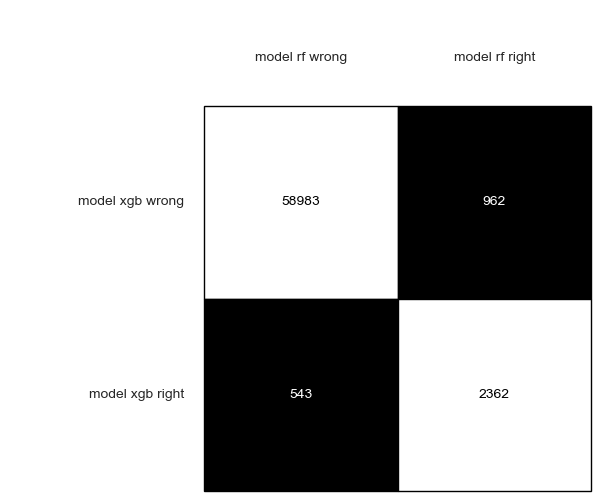

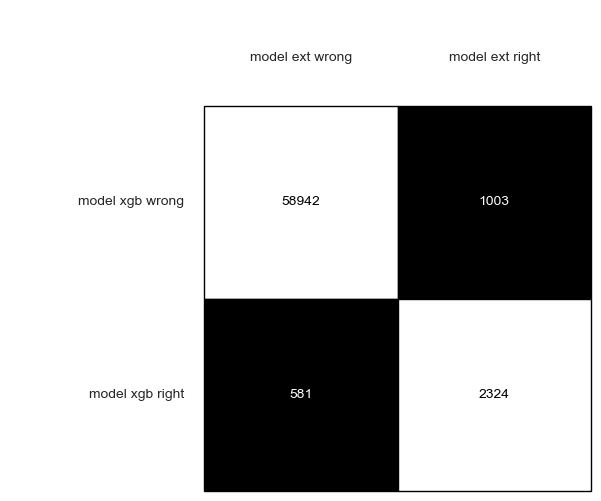

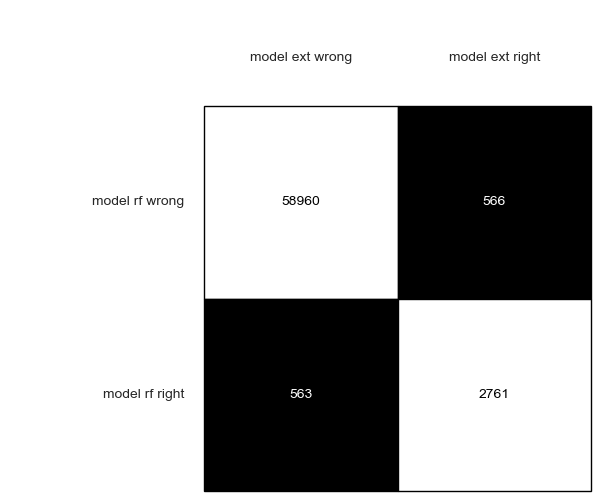

In [29]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [54]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [42]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [43]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

In [57]:
model_performance(extree,y_test, y_pred)

In [ ]:
# modeling

# rf, xgb, extratrees

# compared the scores
# check (heatmap) 
# compared recall/f1/precision


# you decided on an algo 



# [material]  => constant (data)
# [capabilities] => variables (hyperparameters)



# param range of change
# estimator model
# search algo

# <span style="font-family:cursive;text-align:center">🛠️ Hyperparameter Tuning</span>

In [58]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.9341671799193357)

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
   <b><u>Parameters:</u></b>
  'ccp_alpha':<span style="color:red">0.0</span>,
  'criterion': <span style="color:red">'gini'</span>,
  'max_depth': <span style="color:red">11</span>,
  'min_samples_split': <span style="color:red">3</span>,
  'n_estimators': <span style="color:red">400</span>
<br>
<b><u>Best Score: </u></b><span style="color:red">0.93</span><br>
</div>

In [59]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2},
 0.9487612977504489)

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
   <b><u>Parameters:</u></b>
  'class_weight':<span style="color:red">balanced</span>,
  'max_depth': <span style="color:red">15</span>,
  'min_samples_split': <span style="color:red">2</span>,
<br>
<b><u>Best Score: </u></b><span style="color:red">0.95</span><br>
</div>

In [60]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=400)

In [61]:
print(extree_tuned.feature_importances_)

[0.00126691 0.04269215 0.01308997 0.02242324 0.00642711 0.04482916
 0.00116969 0.00458637 0.0097759  0.01841371 0.00080414 0.14988892
 0.06326693 0.01571608 0.06222376 0.04958745 0.05586862 0.0544906
 0.06210033 0.02817979 0.06074179 0.04374416 0.00998312 0.04532425
 0.00273703 0.03105657 0.0011163  0.00162354 0.00153962 0.0252874
 0.02018001 0.02478484 0.02366287 0.00141768]


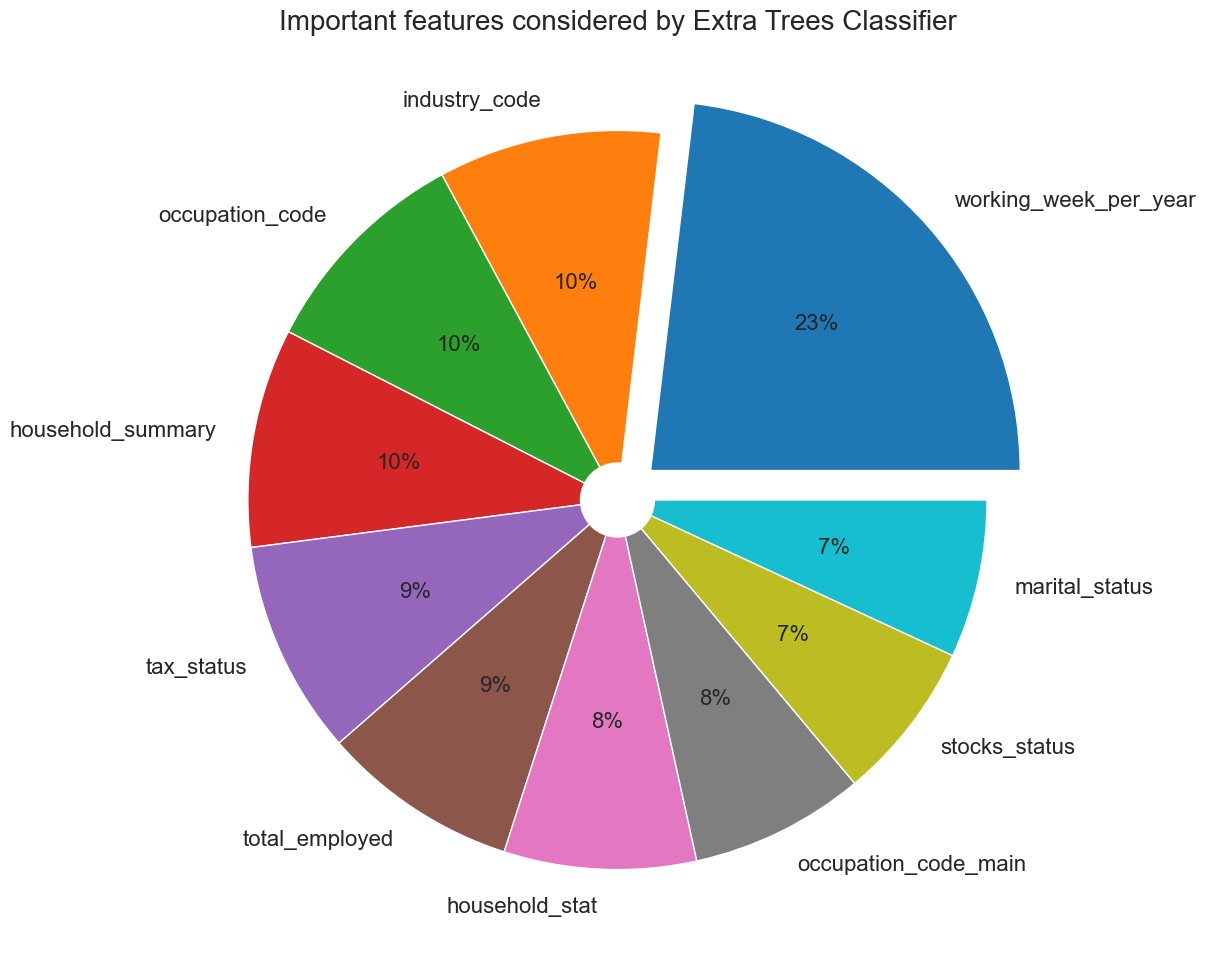

In [62]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

# Explainable AI

In [1]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --use-pep517

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [1]:
!pip install --quiet shap==0.39.0

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [124 lines of output]
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
  Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
  C:\ProgramData\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creat

In [ ]:

import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'shap'